**Heart Diseases Analysis**

<img src="http://www.mankatoclinic.com/stuff/contentmgr/files/0/50f64ba40de262bb3a6bd3e6f50bc9de/image/12_children.jpg" width="700px">

**Importing Libraries**

In [1]:
!pip install bubbly

  Stored in directory: /tmp/.cache/pip/wheels/cf/3c/75/8c09dbf7cd6b320b69a6bc679fd111abd1139866c722b1476b
Successfully built bubbly


In [2]:
!pip install pandas-profiling

In [3]:
# for basic operations
import numpy as np
import pandas as pd
import pandas_profiling

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# for advanced visualizations 
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected = True)
from bubbly.bubbly import bubbleplot

# for providing path
import os
print(os.listdir('../input/'))

# for model explanation
import shap

['heart.csv']


/opt/conda/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)



In [4]:
# reading the data
data = pd.read_csv('../input/heart.csv')

# getting the shape
data.shape

(303, 14)

**Data Description**

age: The person's age in years


sex: The person's sex (1 = male, 0 = female)


cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)


trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)


chol: The person's cholesterol measurement in mg/dl


fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)


restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)


thalach: The person's maximum heart rate achieved


exang: Exercise induced angina (1 = yes; 0 = no)


oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)


slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)


ca: The number of major vessels (0-3)


thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)


target: Heart disease (0 = no, 1 = yes)


<img src="https://mir-s3-cdn-cf.behance.net/project_modules/disp/19d6b946017221.584577bc3cd67.gif" width="700px">

In [5]:
# reading the head of the data

data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
# describing the data

data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Data Profiling

In [7]:
profile = pandas_profiling.ProfileReport(data)
profile

Number of variables,14
Number of observations,303
Total Missing (%),0.0%
Total size in memory,33.2 KiB
Average record size in memory,112.3 B
Numeric,10
Categorical,0
Boolean,4
Date,0
Text (Unique),0
Rejected,0


## Data Visualizations

In [8]:
import warnings
warnings.filterwarnings('ignore')

figure = bubbleplot(dataset = data, x_column = 'trestbps', y_column = 'chol', 
    bubble_column = 'sex', time_column = 'age', size_column = 'oldpeak', color_column = 'sex', 
    x_title = "Resting Blood Pressure", y_title = "Cholestrol", title = 'BP vs Chol. vs Age vs Sex vs Heart Rate',
    x_logscale = False, scale_bubble = 3, height = 650)

py.iplot(figure, config={'scrollzoom': True})

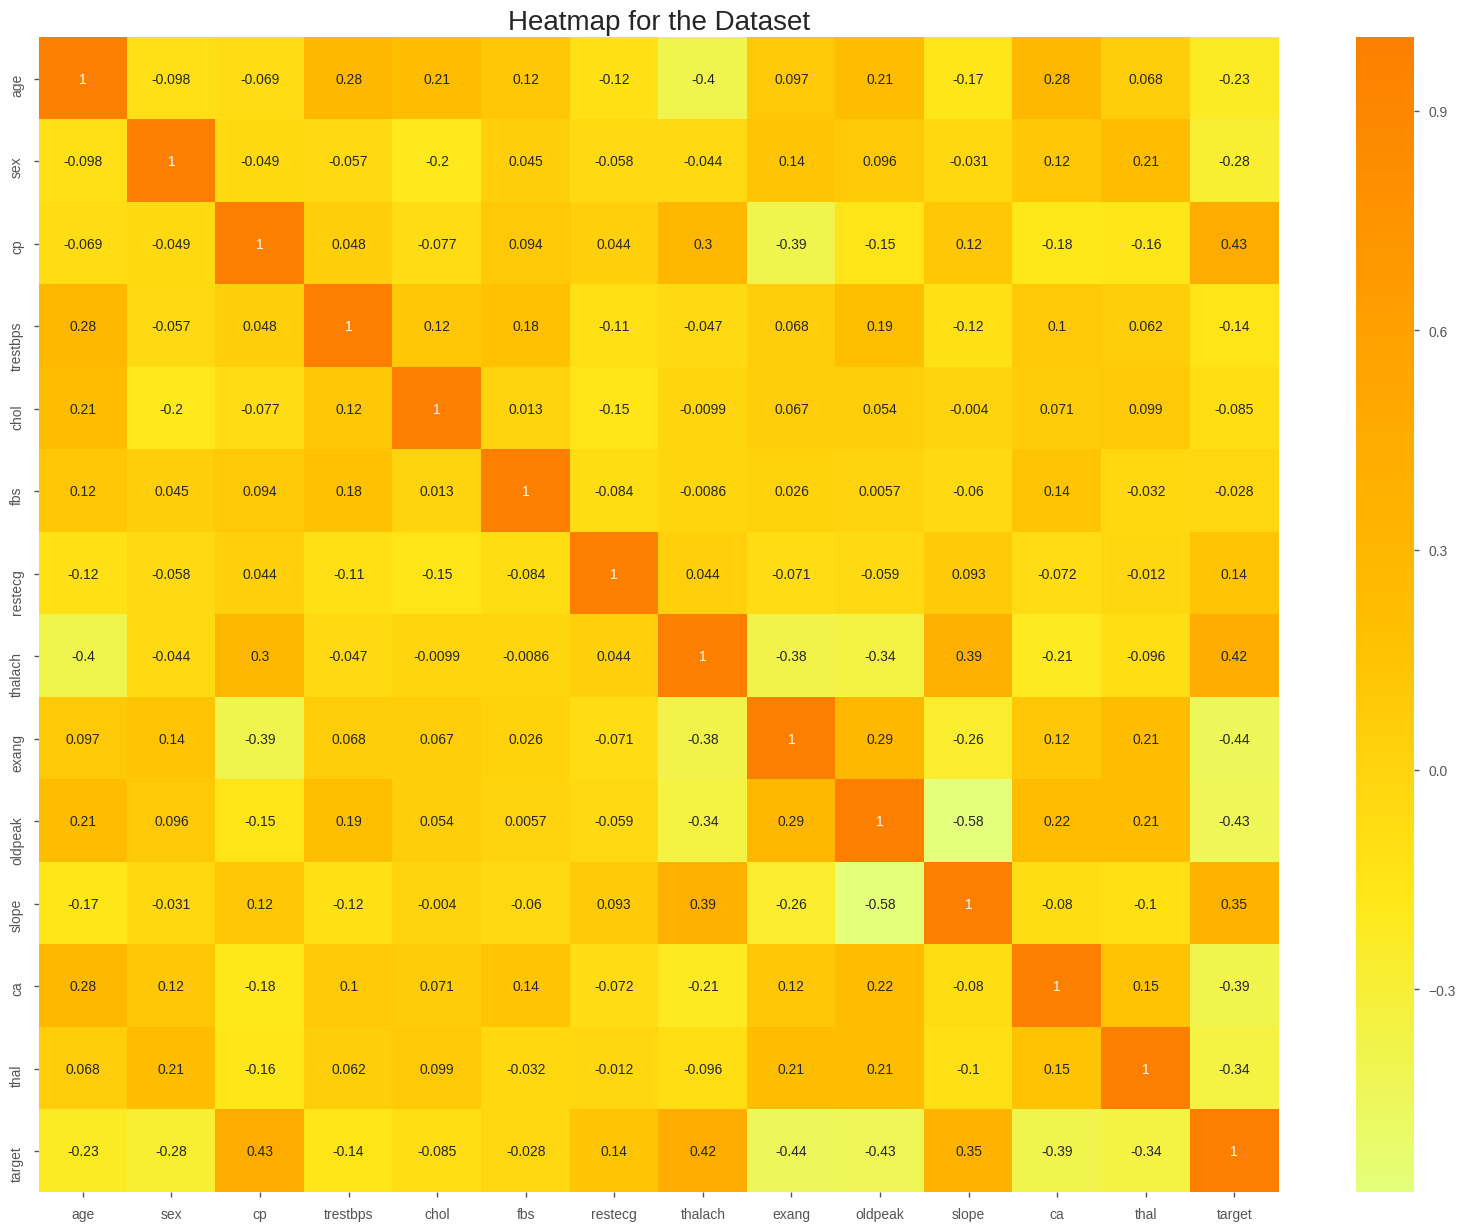

In [9]:
# making a heat map

plt.rcParams['figure.figsize'] = (20, 15)
plt.style.use('ggplot')

sns.heatmap(data.corr(), annot = True, cmap = 'Wistia')
plt.title('Heatmap for the Dataset', fontsize = 20)
plt.show()

> The above heat map is to show the correlations amongst the different attributes of the given dataset. The above Heat Map shows that almost all of the features/attributes given in the dataset are very less correlated with each other. This implies we must include all of the features, as we can only eliminate those features where the correlation of two or more features are very high.

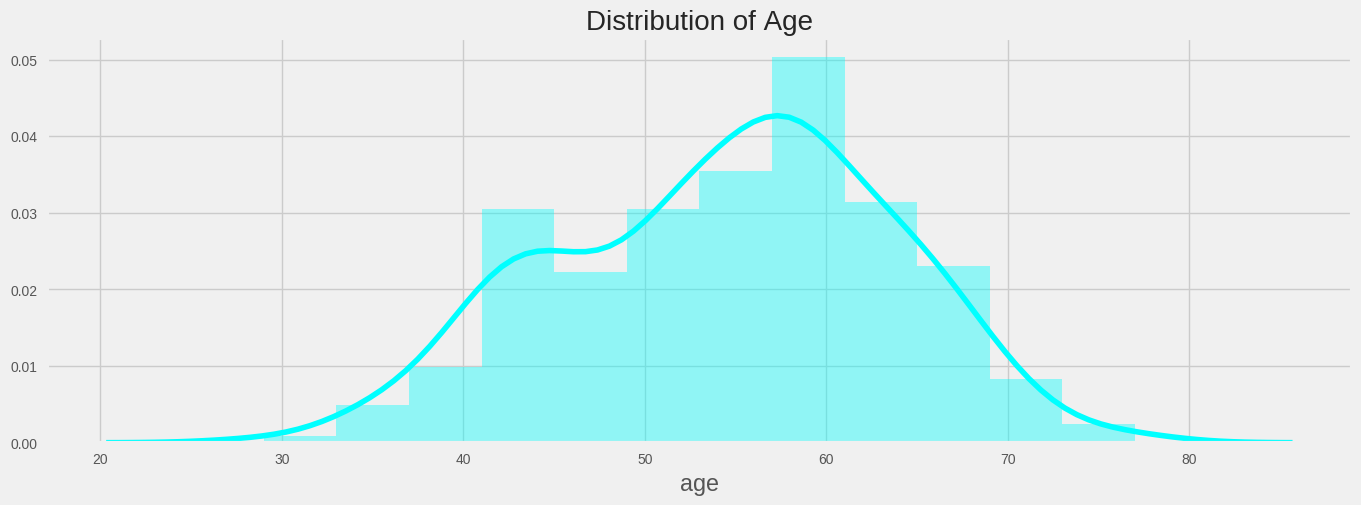

In [10]:
# checking the distribution of age amonng the patients

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 5)
sns.distplot(data['age'], color = 'cyan')
plt.title('Distribution of Age', fontsize = 20)
plt.show()

> The above Distribution plot shows the distribution of Age amongst all of the entries in the dataset about the heart patients. The Graph suggests that the highest number of people suffering from heart diseases are in the age group of 55-65 years. The patients in the age group 20-30 are very less likely to suffer from heart diseases.
>> As we know that the number of people in the age group 65-80 has a very low population, hence distribution is also less. we might have to opt for other plots to investigate further and get some more intuitive results.

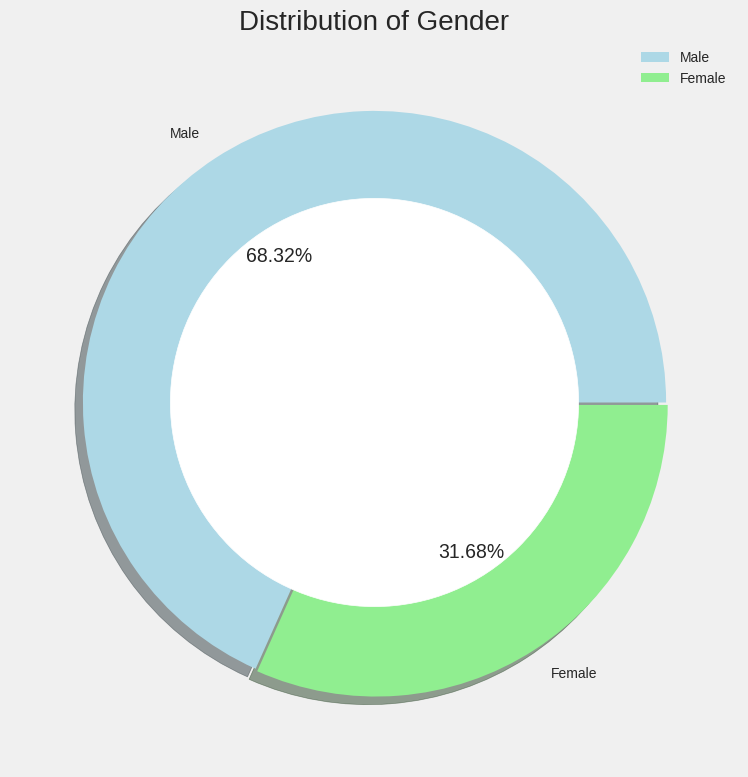

In [11]:
# plotting a donut chart for visualizing each of the recruitment channel's share

size = data['sex'].value_counts()
colors = ['lightblue', 'lightgreen']
labels = "Male", "Female"
explode = [0, 0.01]

my_circle = plt.Circle((0, 0), 0.7, color = 'white')

plt.rcParams['figure.figsize'] = (9, 9)
plt.pie(size, colors = colors, labels = labels, shadow = True, explode = explode, autopct = '%.2f%%')
plt.title('Distribution of Gender', fontsize = 20)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.legend()
plt.show()

> The above Pie chart, whhich shows us the distribution of Gender in the Heart diseases. By looking at the plot, we can **assume** that Males are two times more likely to suffer from heart diseases in comparison to females.
>> According to our study, From all the Entries in our dataset 68% of the patients are men whereas only 32% are women. More number of men took participation in heart disease check ups.

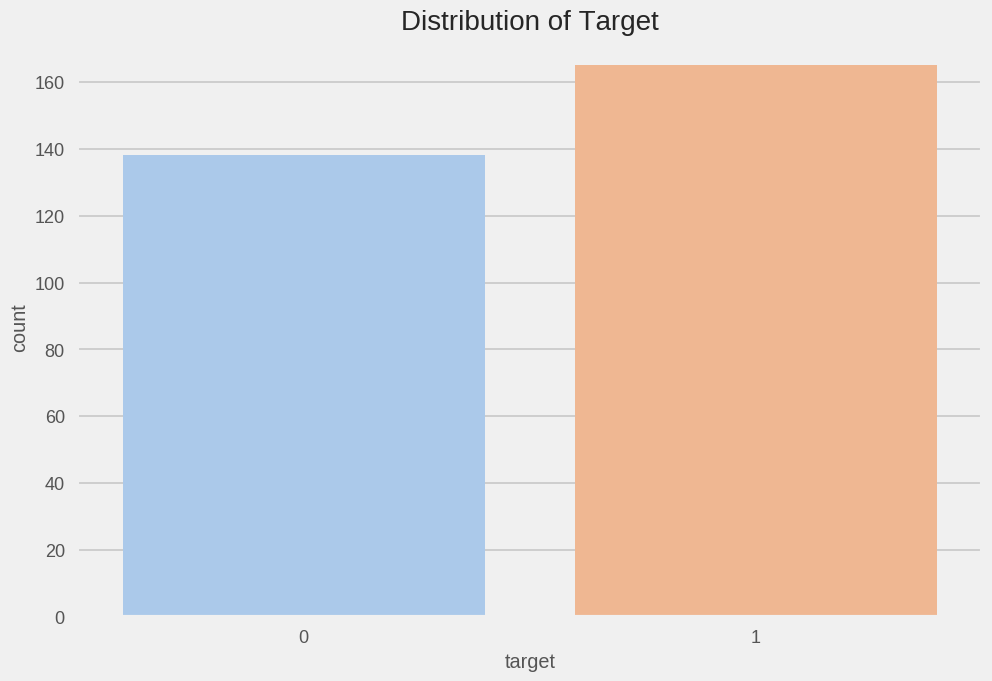

In [12]:
# plotting the target attribute

plt.rcParams['figure.figsize'] = (15, 7)
plt.style.use('seaborn-talk')
sns.countplot(data['target'], palette = 'pastel')
plt.title('Distribution of Target', fontsize = 20)
plt.show()

> Let's look at the Target, The dataset is quite balanced with almost equal no. of Positive and Negative Classes. Let's say the Positive Class says that the patient is suffering from the disease and the Negative class says that the patient is not suffering from the disease.

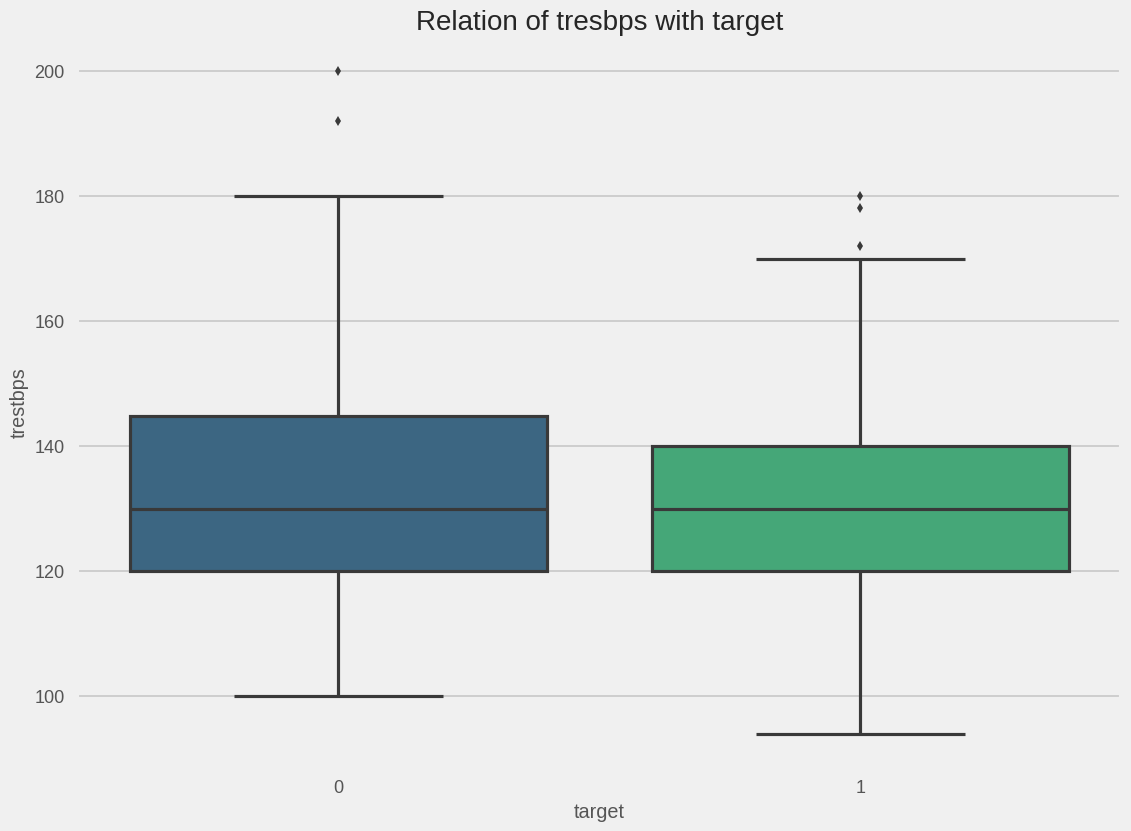

In [13]:
# tresbps vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.boxplot(data['target'], data['trestbps'], palette = 'viridis')
plt.title('Relation of tresbps with target', fontsize = 20)
plt.show()

> tresbps: Resting Blood Pressure, The above Bivariate plot between tresbps(the resting blood pressure of a patient), and the target which says that whether the patient is suffering from the heart disease or not. The plot clearly suggests that the patients who are most likely to not suffer from the disease have a slighly greater blood pressure than the patients who have heart diseases.

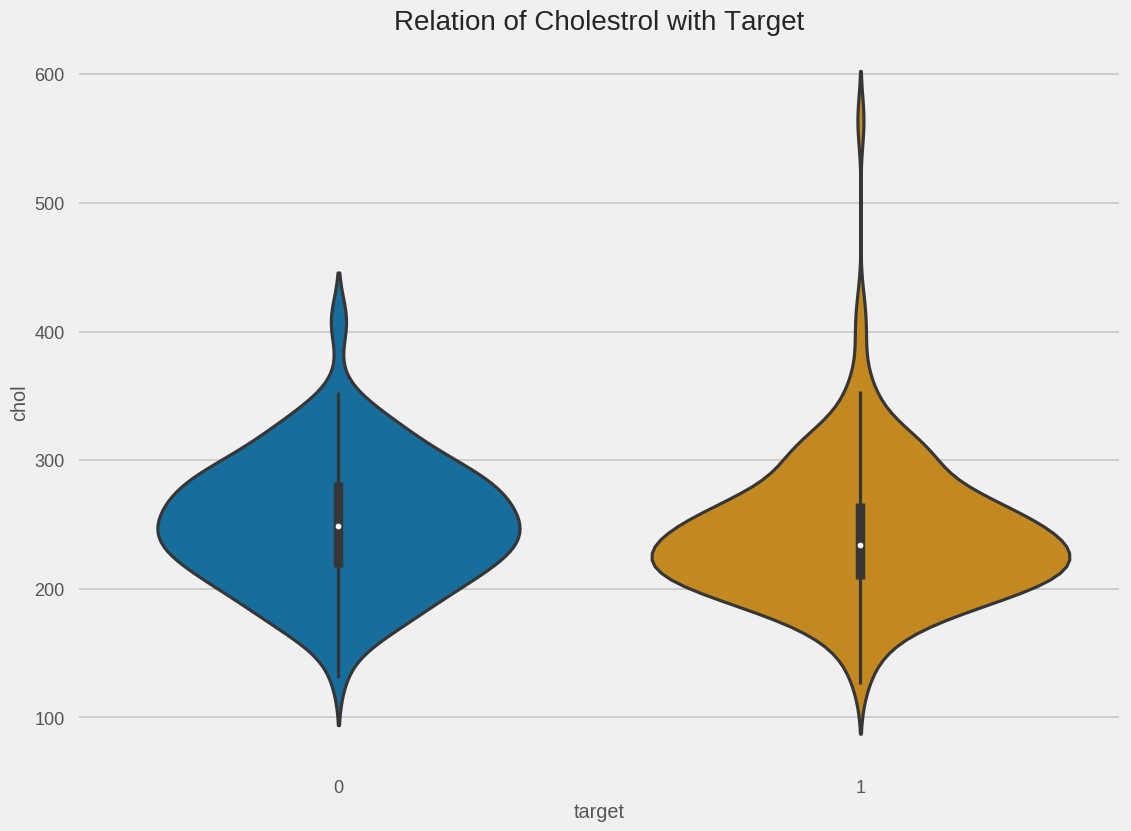

In [14]:
# cholestrol vs target

plt.rcParams['figure.figsize'] = (12, 9)
sns.violinplot(data['target'], data['chol'], palette = 'colorblind')
plt.title('Relation of Cholestrol with Target', fontsize = 20, fontweight = 30)
plt.show()

> The above Bivariate plot between cholestrol levels and target suggests that the Patients likely to suffer from heart diseases are having higher cholestrol levels in comparison to the patients with target 0(likely to not suffer from the heart diseases.
>> Hence, we can infer from the above plot that the cholestrol levels plays an important role in determining heart diseases. We all must keep our cholestrol levels in control as possible.

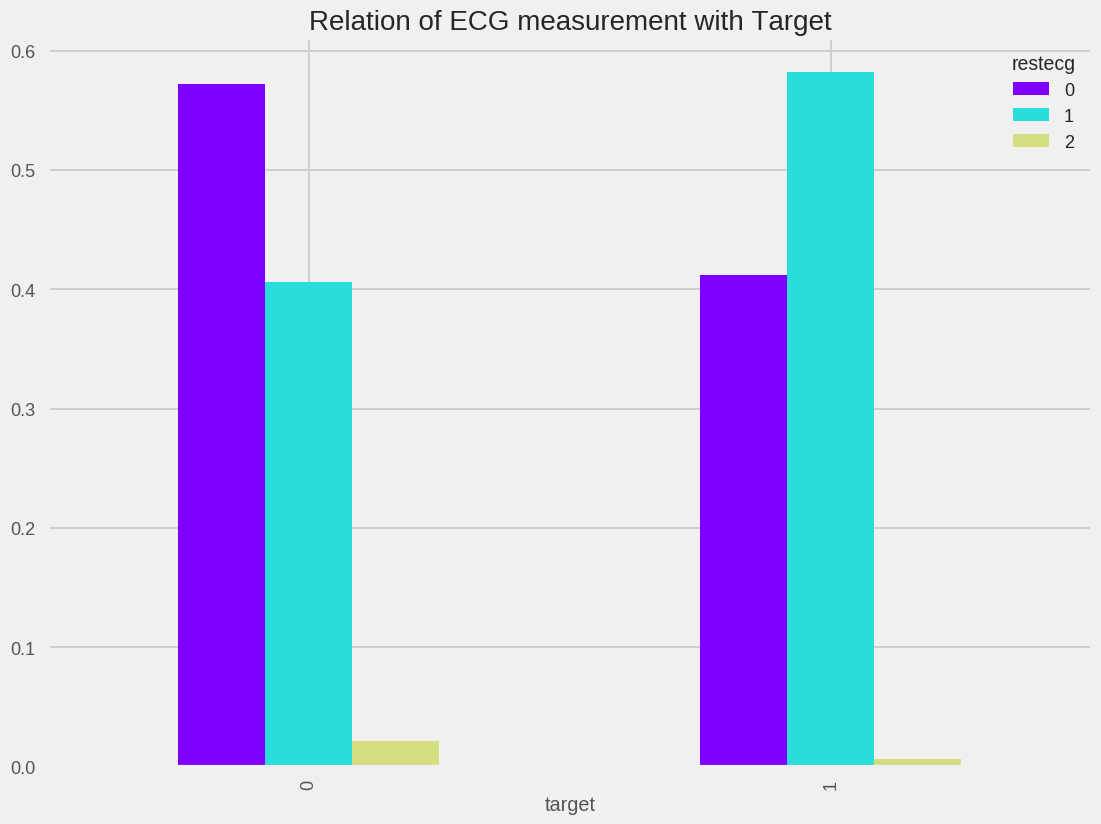

In [15]:
# Resting electrocardiographic measurement vs target
  
plt.rcParams['figure.figsize'] = (12, 9)
dat = pd.crosstab(data['target'], data['restecg']) 
dat.div(dat.sum(1).astype(float), axis = 0).plot(kind = 'bar', 
                                                 stacked = False, 
                                                 color = plt.cm.rainbow(np.linspace(0, 1, 4)))
plt.title('Relation of ECG measurement with Target', fontsize = 20, fontweight = 30)
plt.show()

> The above plot is column bar chart representing target vs ECG Measurements(Electro Cardio Gram), The above plot shows that the more number of patients not likely to suffer from heart diseases are having restscg value 0 whereas more number of people have restecg value 1 in case of more likelihood of suffering from a heart disease.

> This Heat Map, between Target and Maximum Heart Rate shows that the patients who are likely to suffer from heart diseases are having higher maximum heart rates whereas the patients who are not likely to suffer from any heart diseases are having lower maximum heart rates.
>> This implies it is very important to keep our heart rates low, to keep ourselves healthy and safe from any dangerous heart diseases.

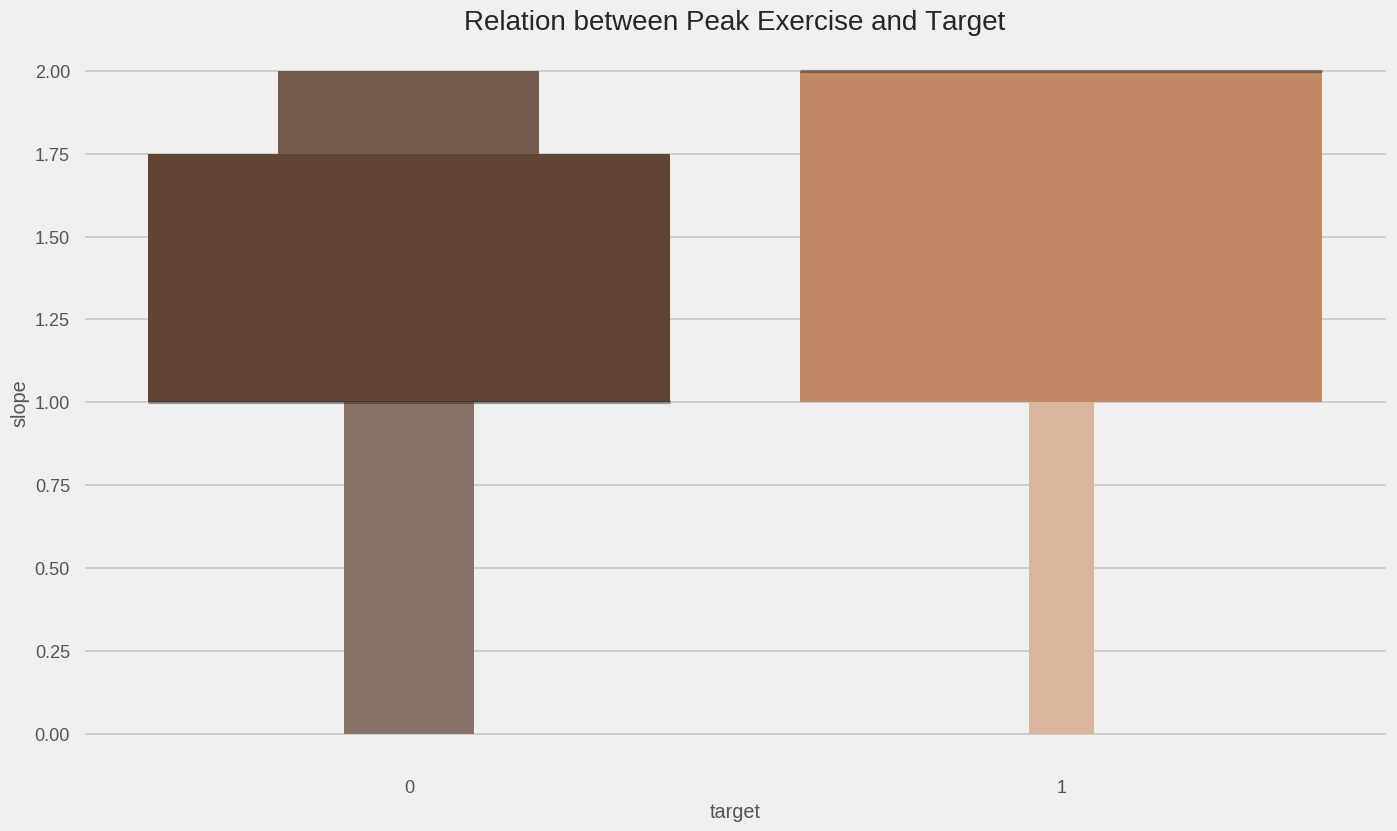

In [16]:
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# checking the relation between slope and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.boxenplot(data['target'], data['slope'], palette = 'copper')
plt.title('Relation between Peak Exercise and Target', fontsize = 20, fontweight = 30)
plt.show()

> Slope : 0 refers to upsloping, 1 refers to flat Exercises pattern.
>>This plot clearly shows that the patients who are not likely to suffer from any heart diseases are mostly having value 1 means upsloping, whereas very few people suffering from heart diseases have upsloping pattern in exercises.
>> Also, Flat Exercises are mostly seen in the cases of Patients who are more likely to suffer from heart diseases.

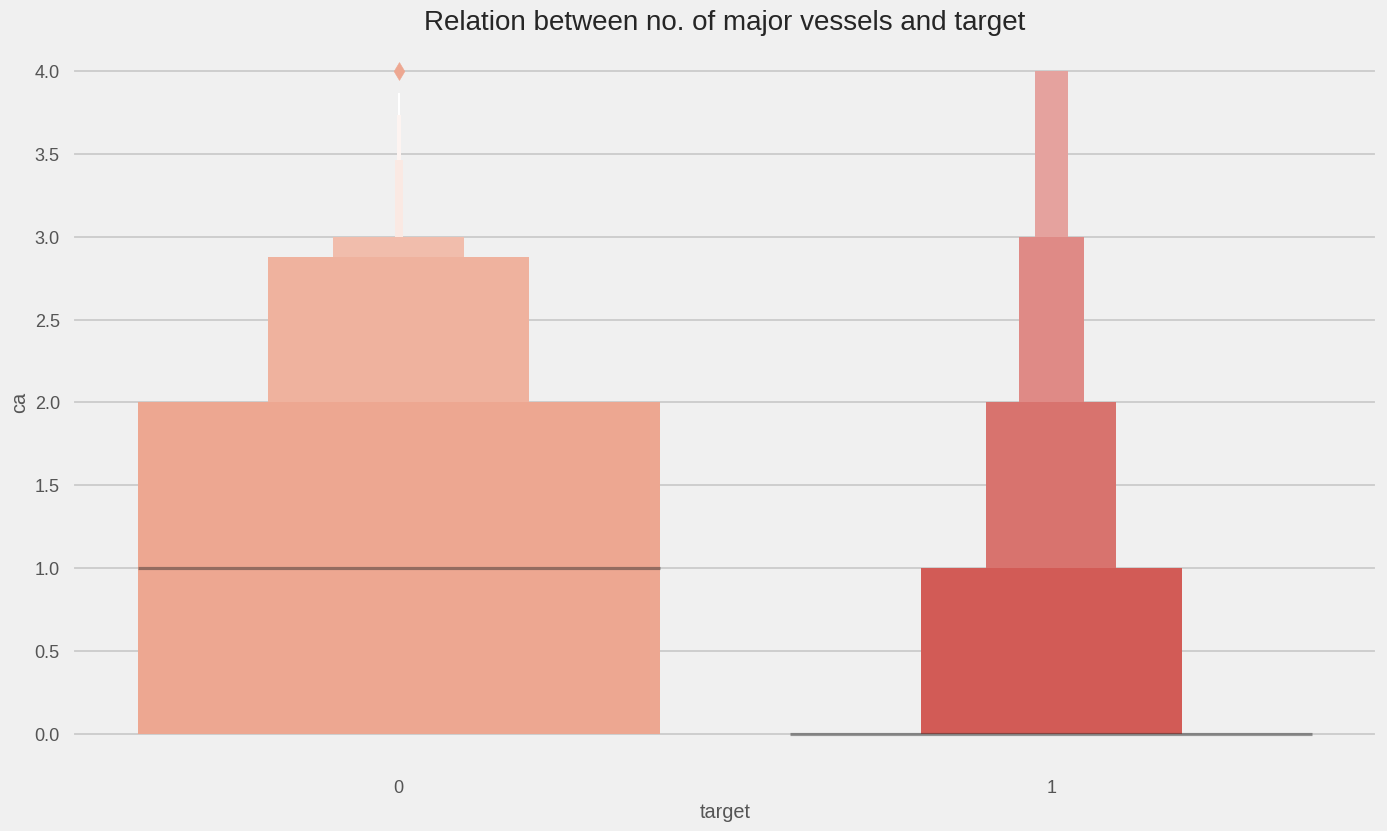

In [17]:
#ca: The number of major vessels (0-3)

sns.boxenplot(data['target'], data['ca'], palette = 'Reds')
plt.title('Relation between no. of major vessels and target', fontsize = 20, fontweight = 30)
plt.show()

> The above Bivariate plot between Target and Number of Major Vessels, shows that the patients who are more likely to suffer from Heart diseases are having high values of Major Vessels wheras the patiets who are very less likely to suffer from any kind of heart diseases have very low values of Major Vessels.
>> Hence, It is also helpful in determining the heart diseases, the more the number of vessels, the more is the chance of suffering from heart diseases.

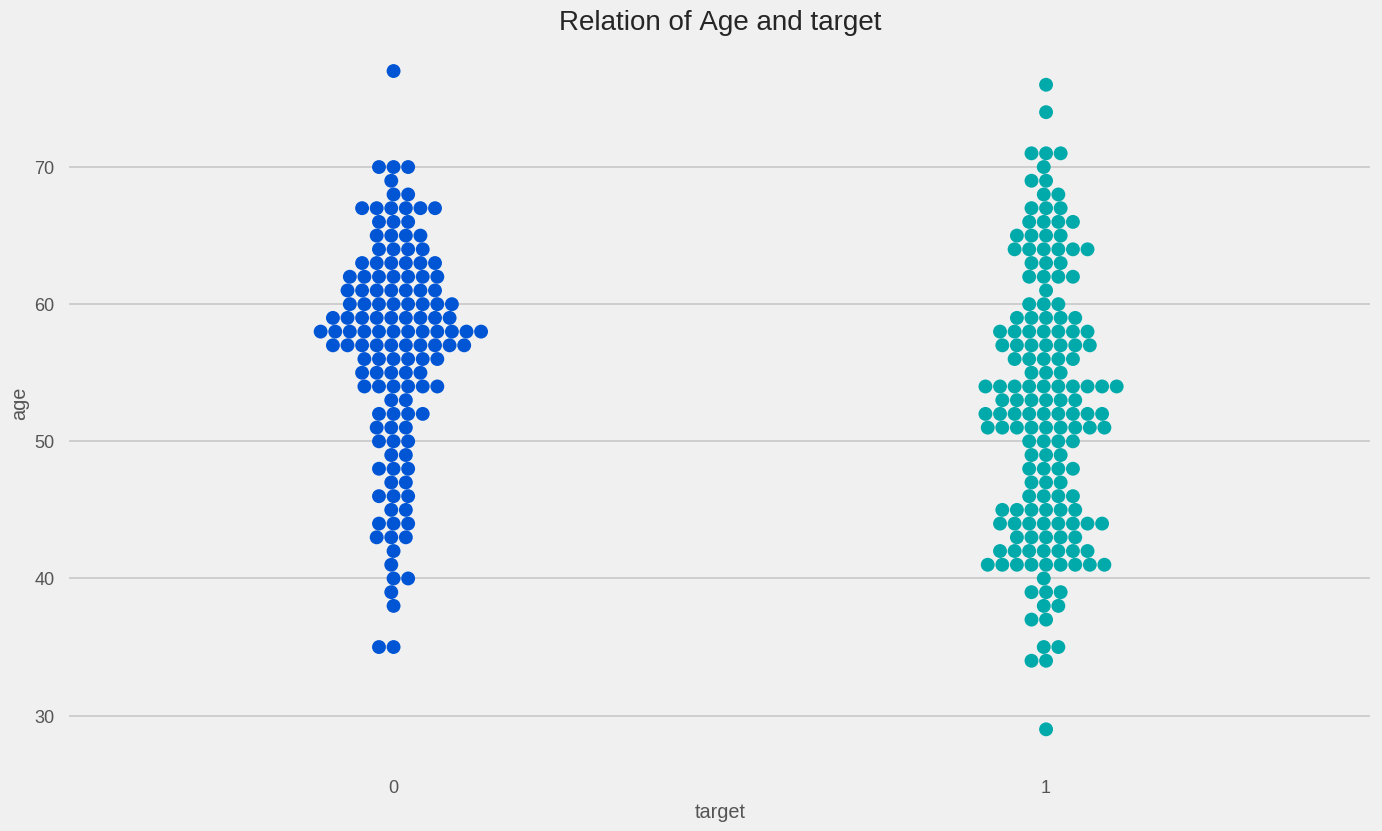

In [18]:
# relation between age and target

plt.rcParams['figure.figsize'] = (15, 9)
sns.swarmplot(data['target'], data['age'], palette = 'winter', size = 10)
plt.title('Relation of Age and target', fontsize = 20, fontweight = 30)
plt.show()

> From the above Swarm plot between the target and the age of the patients, we are not able to find any clue or pattern, so age is not a very good attribute to determine the heart disease of a patient as a patient of heart diseases range from 30-70, whereas it is not important that all of the people lying in that same age group are bound to suffer from the heart diseases.

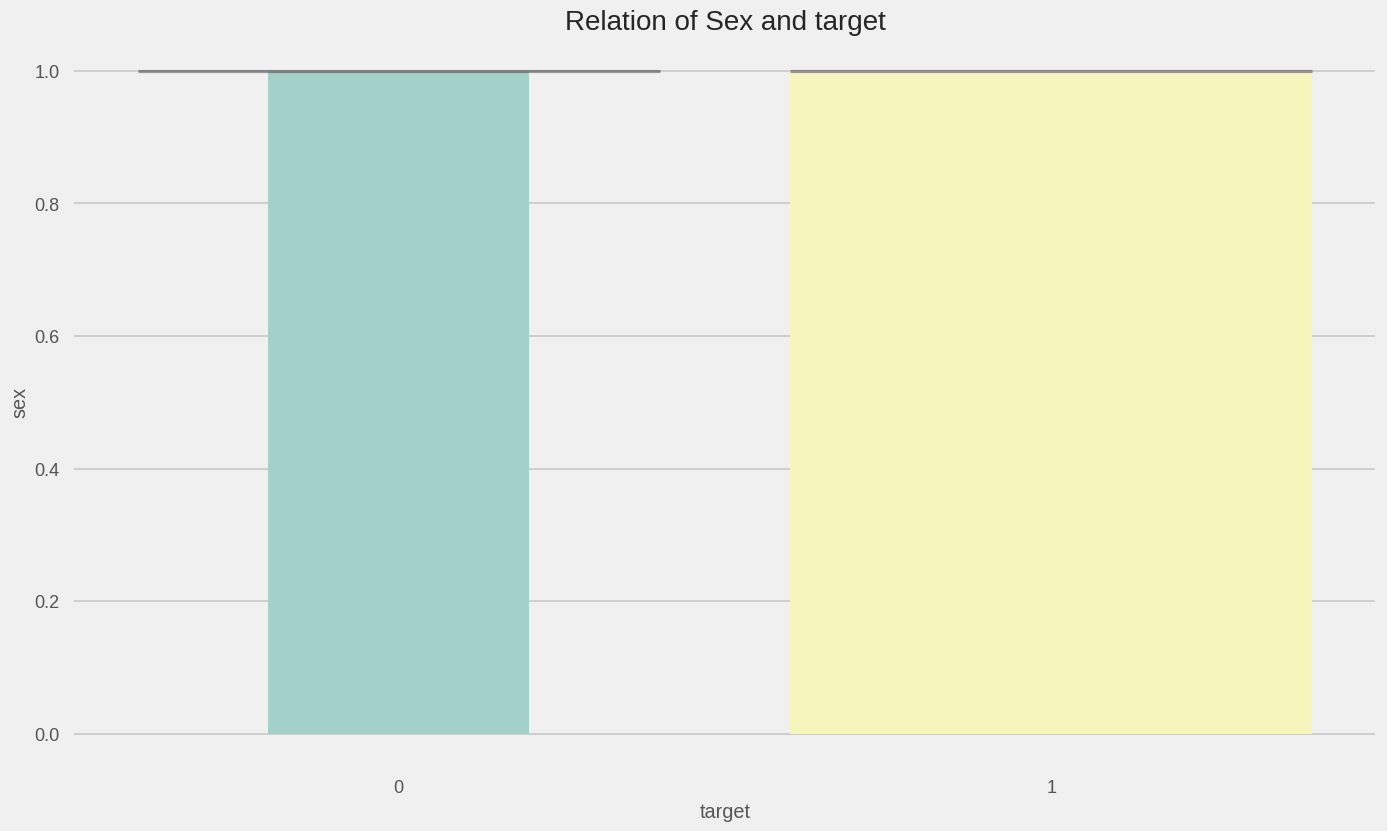

In [19]:
# relation between sex and target

sns.boxenplot(data['target'], data['sex'], palette = 'Set3')
plt.title('Relation of Sex and target', fontsize = 20, fontweight = 30)
plt.show()

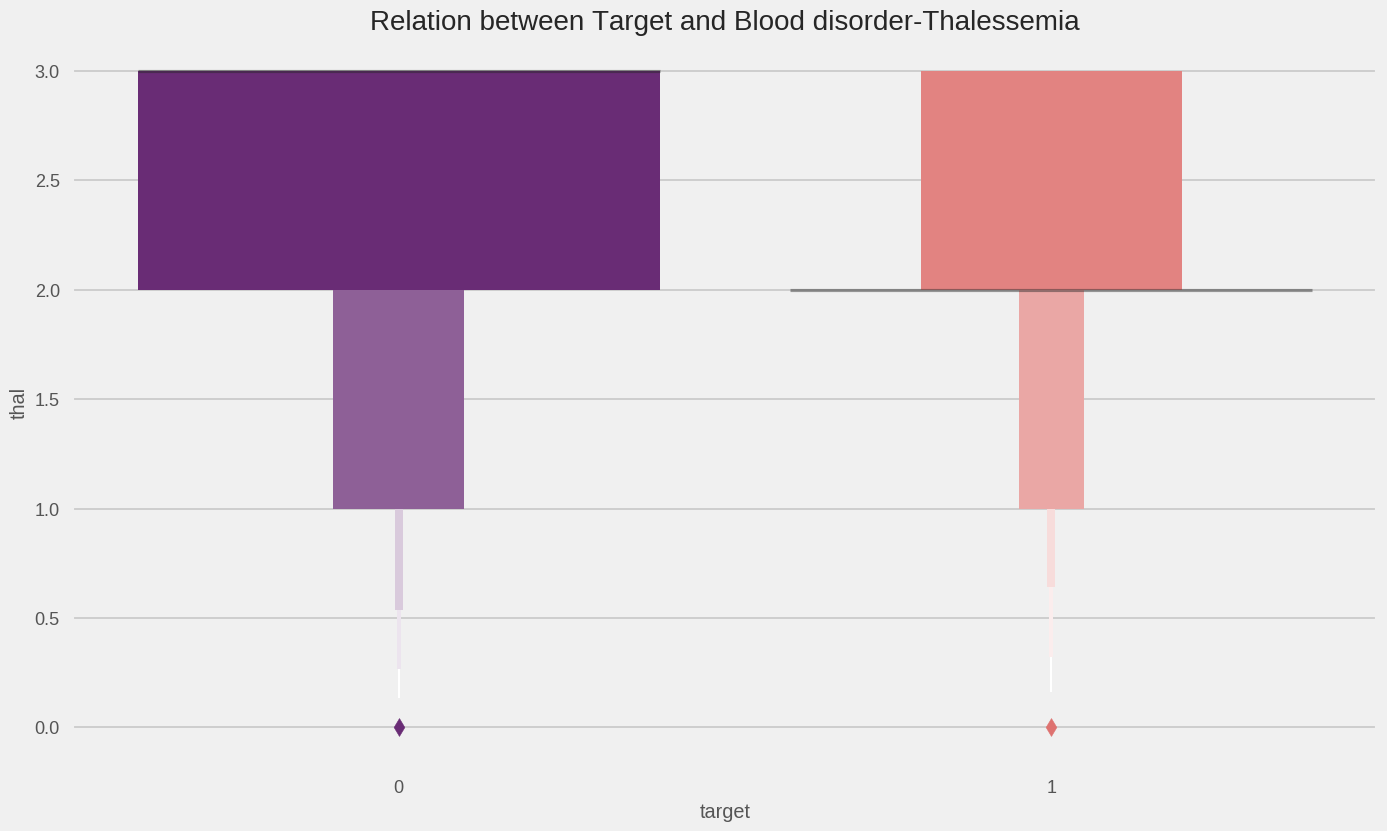

In [20]:
# checking the relation between 
#thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

sns.boxenplot(data['target'], data['thal'], palette = 'magma')
plt.title('Relation between Target and Blood disorder-Thalessemia', fontsize = 20, fontweight = 30)
plt.show()

>In the above Boxen plot between Target and a Blood disorder called Thalessemia, It can be easily inferred that the patients suffering from heart diseases have low chances of also suffering from thalessemia in comparison to the patients who are less likely to suffer from the heart diseases. Hence, It is also a good feature to classify heart diseases.

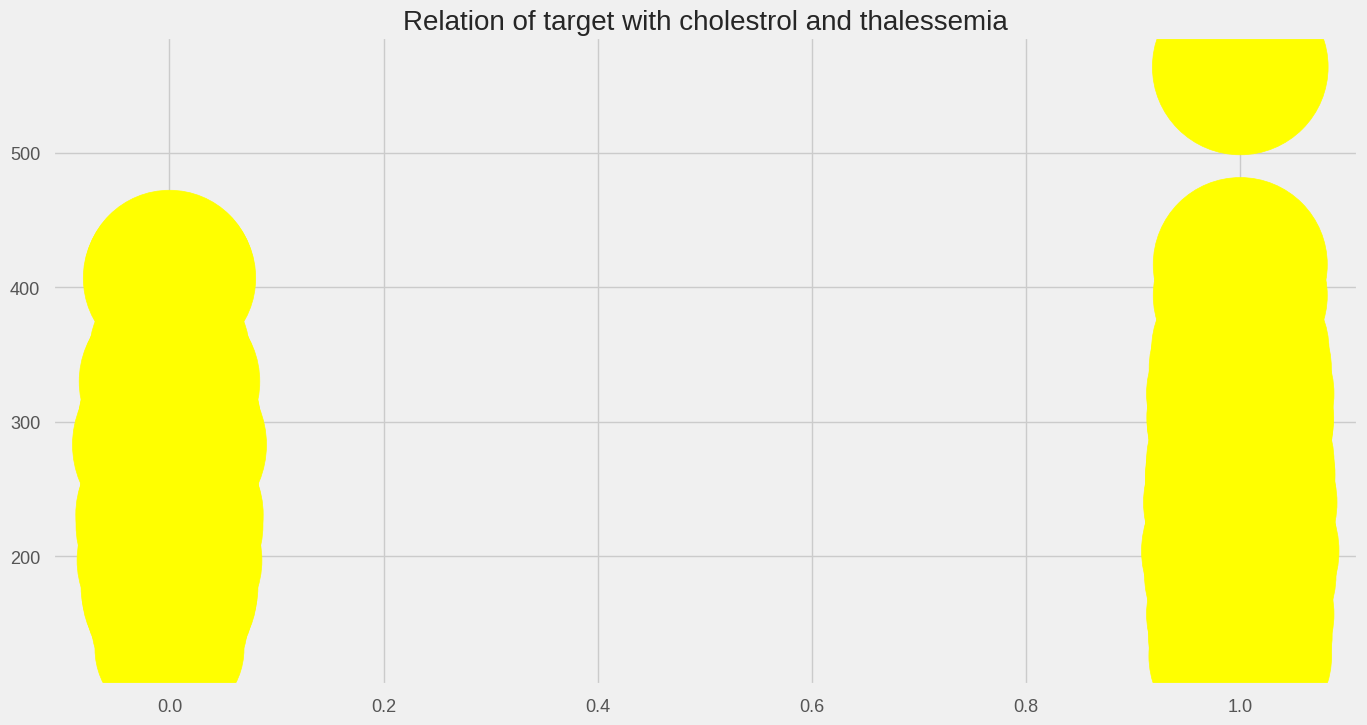

In [21]:
# target vs chol and hue = thalach

plt.rcParams['figure.figsize'] = (15, 8)
plt.style.use('fivethirtyeight')
plt.scatter(x = data['target'], y = data['chol'], s = data['thalach']*100, color = 'yellow')
plt.title('Relation of target with cholestrol and thalessemia', fontsize = 20, fontweight = 30)
plt.show()

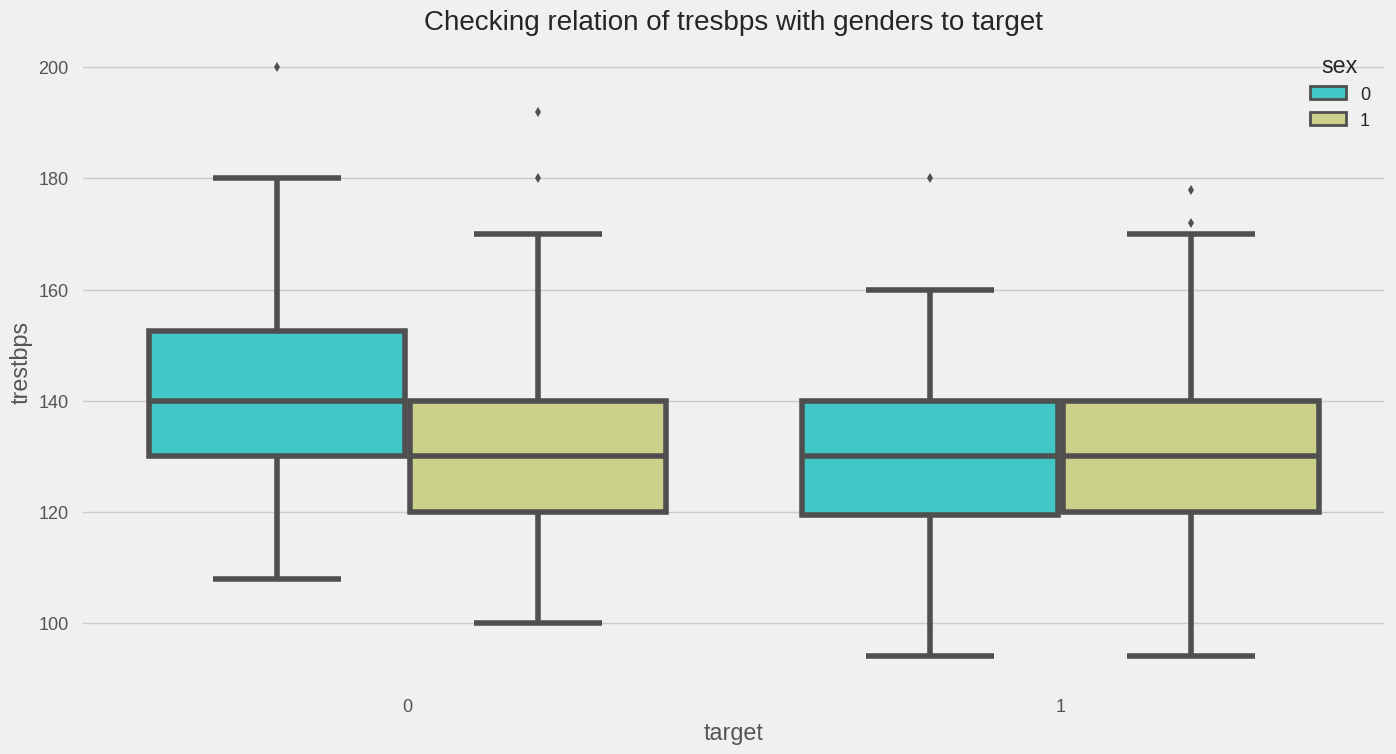

In [22]:
# multi-variate analysis

sns.boxplot(x = data['target'], y = data['trestbps'], hue = data['sex'], palette = 'rainbow')
plt.title('Checking relation of tresbps with genders to target', fontsize = 20, fontweight = 30)
plt.show()

> In the above Box plot between Target and tresbps wrt Gender, shows that Women have higher tresbps than men in case of not suffering from any heart diseases, whereas men and women have almost equal tresbps in case of suffering from a heart diseases. Also, In case of suffering from heart diseases, patients have a slightly lower tresbps in comparison to the patients who are not suffering from heart diseases.

In [23]:
trace = go.Scatter3d(
    x = data['chol'],
    y = data['trestbps'],
    z = data['age'],
    name = 'Marvel',
    mode = 'markers',
    marker = dict(
         size = 10,
         color = data['age']
    )
)

df = [trace]

layout = go.Layout(
    title = 'Cholestrol vs Heart Rate vs Age',
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    ),
    scene = dict(
            xaxis = dict(title  = 'Cholestrol'),
            yaxis = dict(title  = 'Heart Rate'),
            zaxis = dict(title  = 'Age')
        )
    
)
fig = go.Figure(data = df, layout=layout)
py.iplot(fig)

In [24]:
# let's change the names of the  columns for better understanding

data.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

data.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope', 'num_major_vessels', 'thalassemia', 'target'],
      dtype='object')

In [25]:
data['sex'][data['sex'] == 0] = 'female'
data['sex'][data['sex'] == 1] = 'male'

data['chest_pain_type'][data['chest_pain_type'] == 1] = 'typical angina'
data['chest_pain_type'][data['chest_pain_type'] == 2] = 'atypical angina'
data['chest_pain_type'][data['chest_pain_type'] == 3] = 'non-anginal pain'
data['chest_pain_type'][data['chest_pain_type'] == 4] = 'asymptomatic'

data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
data['fasting_blood_sugar'][data['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

data['rest_ecg'][data['rest_ecg'] == 0] = 'normal'
data['rest_ecg'][data['rest_ecg'] == 1] = 'ST-T wave abnormality'
data['rest_ecg'][data['rest_ecg'] == 2] = 'left ventricular hypertrophy'

data['exercise_induced_angina'][data['exercise_induced_angina'] == 0] = 'no'
data['exercise_induced_angina'][data['exercise_induced_angina'] == 1] = 'yes'

data['st_slope'][data['st_slope'] == 1] = 'upsloping'
data['st_slope'][data['st_slope'] == 2] = 'flat'
data['st_slope'][data['st_slope'] == 3] = 'downsloping'

data['thalassemia'][data['thalassemia'] == 1] = 'normal'
data['thalassemia'][data['thalassemia'] == 2] = 'fixed defect'
data['thalassemia'][data['thalassemia'] == 3] = 'reversable defect'

In [26]:
data['sex'] = data['sex'].astype('object')
data['chest_pain_type'] = data['chest_pain_type'].astype('object')
data['fasting_blood_sugar'] = data['fasting_blood_sugar'].astype('object')
data['rest_ecg'] = data['rest_ecg'].astype('object')
data['exercise_induced_angina'] = data['exercise_induced_angina'].astype('object')
data['st_slope'] = data['st_slope'].astype('object')
data['thalassemia'] = data['thalassemia'].astype('object')

In [27]:
# taking the labels out from the data

y = data['target']

data = data.drop('target', axis = 1)

print("Shape of y:", y.shape)

Shape of y: (303,)


In [28]:
# one hot encoding of the data
# drop_first = True, means dropping the first categories from each of the attribues 
# for ex gender having gender_male and gender-female would be male having values 1 and 0


data = pd.get_dummies(data, drop_first=True)


In [29]:
# checking the dataset after encoding

data.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,0,0,0,0,1,0,0,1,1,0,1,0,0


In [30]:
# splitting the dependent and independent variables from the data

x = data

# checking the shapes of x and y
print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

Shape of x: (303, 19)
Shape of y: (303,)


In [31]:
y.value_counts()

1    165
0    138
Name: target, dtype: int64

In [32]:
# splitting the sets into training and test sets

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

# getting the shapes
print("Shape of x_train :", x_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_train :", y_train.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (242, 19)
Shape of x_test : (61, 19)
Shape of y_train : (242,)
Shape of y_test : (61,)


Diagnostic tests are often sold, marketed, cited and used with sensitivity and specificity as the headline metrics. Sensitivity and specificity are defined as,

Sensitivity = TruePositives/TruePositives+FalseNegatives

Specificity = FalseNegatives/FalseNegatives+TruePositives

**Modelling**

## Random Forest Classifier

Training Accuracy : 0.9462809917355371
Testing Accuracy : 0.8524590163934426
              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.86      0.88      0.87        34

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



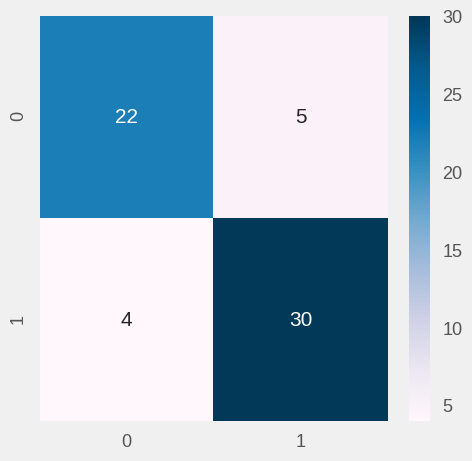

In [33]:
# MODELLING
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(x_train, y_train)
y_predict = model.predict(x_test)
y_pred_quant = model.predict_proba(x_test)[:, 1]
y_pred = model.predict(x_test)

# evaluating the model
print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)

**Tree for Model Explanation**

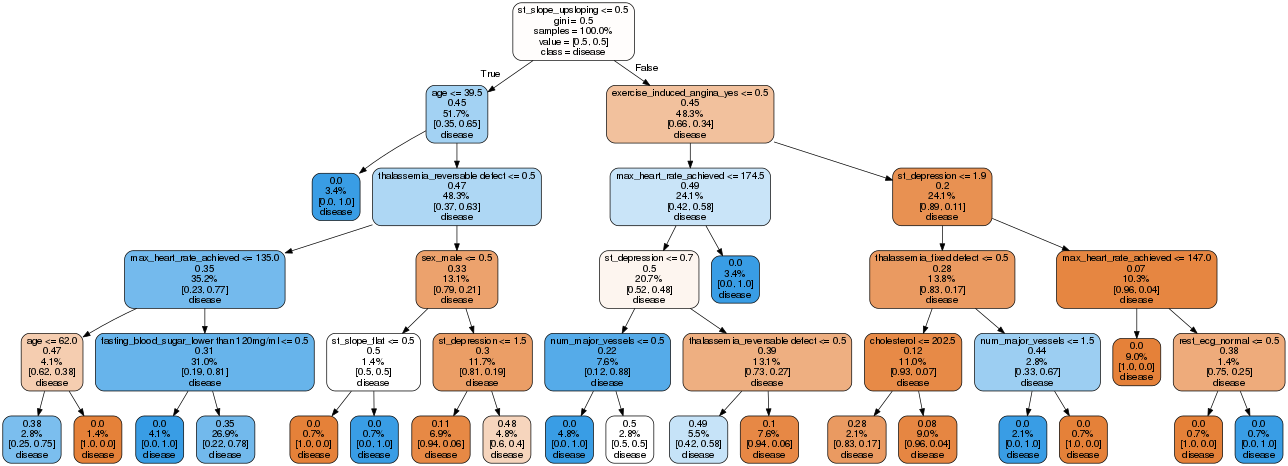

In [34]:
from sklearn.tree import export_graphviz

estimator = model.estimators_[1]
feature_names = [i for i in x_train.columns]

y_train_str = y_train.astype('str')
y_train_str[y_train_str == '0'] = 'no disease'
y_train_str[y_train_str == '1'] = 'disease'
y_train_str = y_train_str.values


export_graphviz(estimator, out_file='tree.dot', 
                feature_names = feature_names,
                class_names = y_train_str,
                rounded = True, proportion = True, 
                label='root',
                precision = 2, filled = True)

from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=50'])

from IPython.display import Image
Image(filename = 'tree.png')


**Specificity and Sensitivity**

In [35]:
total=sum(sum(cm))

sensitivity = cm[0,0]/(cm[0,0]+cm[1,0])
print('Sensitivity : ', sensitivity )

specificity = cm[1,1]/(cm[1,1]+cm[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8461538461538461
Specificity :  0.8571428571428571


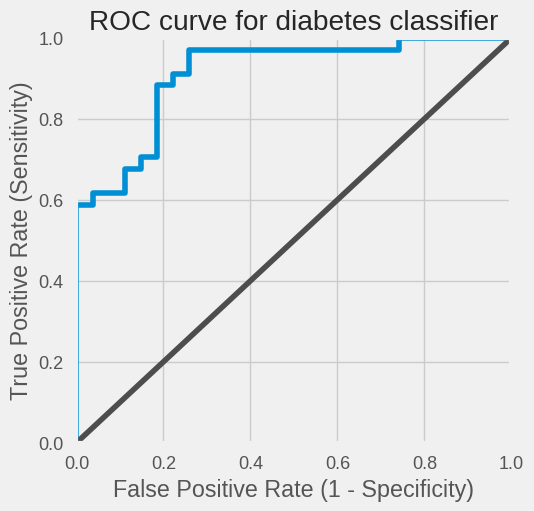

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [37]:
# let's check the auc score

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)

AUC Score : 0.9117647058823529


## Model Explanation

In [38]:
# importing ML Explanability Libraries


#for purmutation importance
import eli5 
from eli5.sklearn import PermutationImportance

#for SHAP values
import shap 
from pdpbox import pdp, info_plots #for partial plots


**Eli5 Values**

In [39]:
# let's check the importance of each attributes

perm = PermutationImportance(model, random_state = 0).fit(x_test, y_test)
eli5.show_weights(perm, feature_names = x_test.columns.tolist())

Weight,Feature
0.0623 ± 0.0840,num_major_vessels
0.0295 ± 0.0382,exercise_induced_angina_yes
0.0295 ± 0.0382,max_heart_rate_achieved
0.0262 ± 0.0334,thalassemia_fixed defect
0.0262 ± 0.0262,st_depression
0.0197 ± 0.0382,thalassemia_reversable defect
0.0164 ± 0.0000,st_slope_upsloping
0.0131 ± 0.0131,chest_pain_type_non-anginal pain
0.0131 ± 0.0131,cholesterol
0.0131 ± 0.0131,chest_pain_type_typical angina


**Partial Dependence Plot for Top 5 Features**

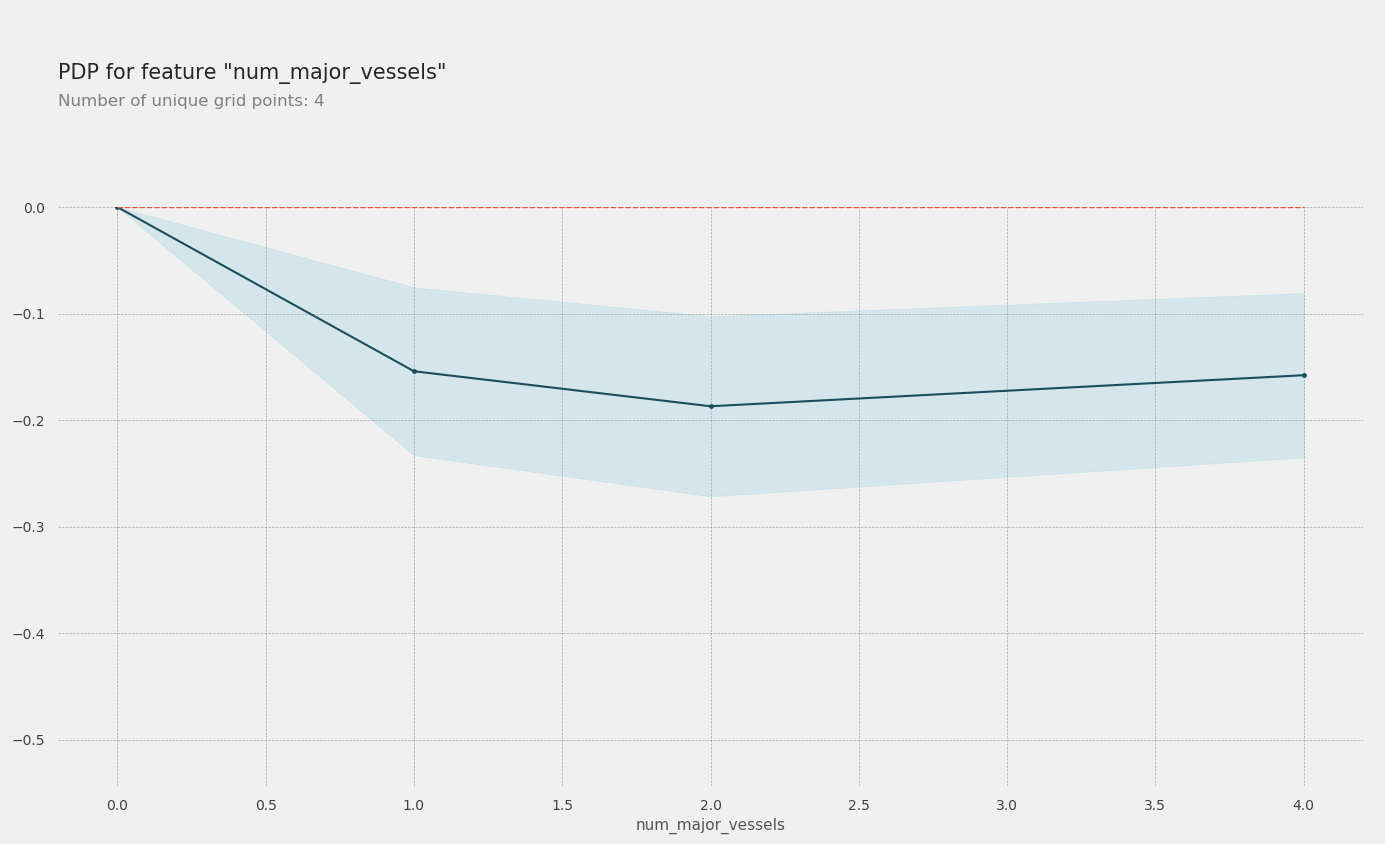

In [40]:
# plotting the partial dependence plot for num_major_vessels

base_features = data.columns.values.tolist()

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


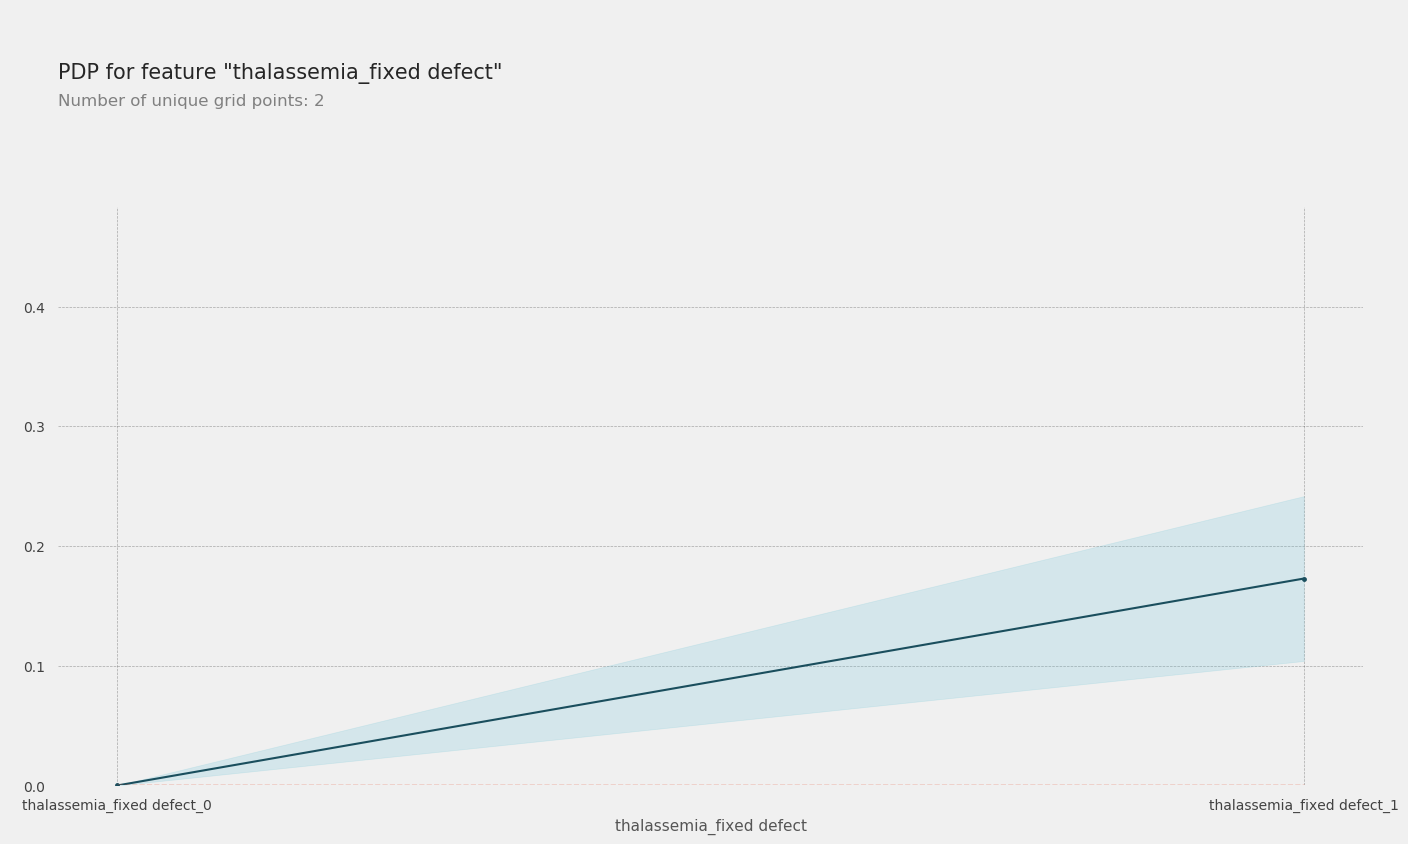

In [41]:
# let's plot the partial dependence plot for thalassemia_fixed defect

base_features = data.columns.values.tolist()

feat_name = 'thalassemia_fixed defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


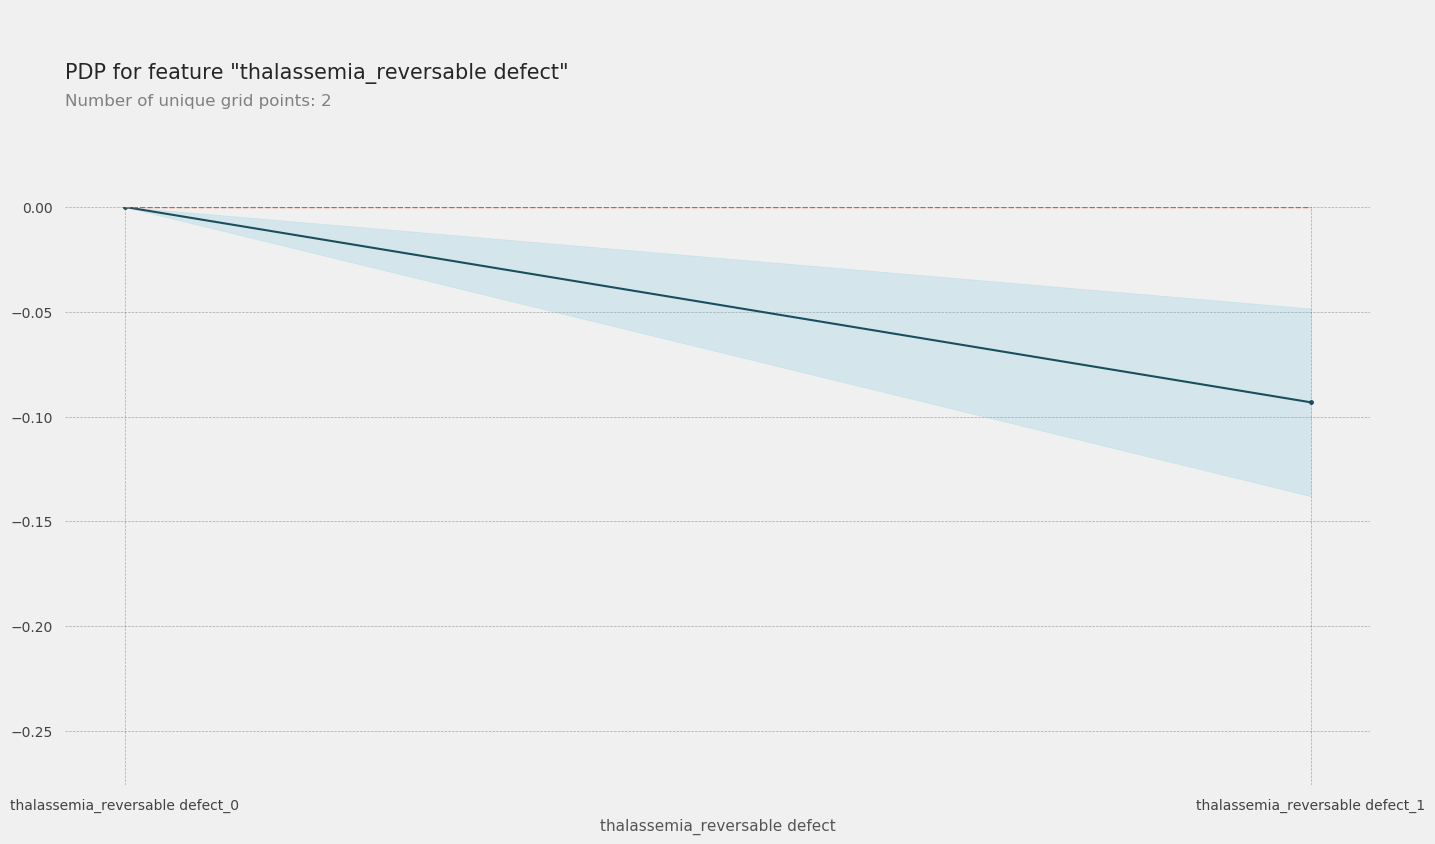

In [42]:

# let's plot the partial dependence plot for thalassemia_reversable defect

base_features = data.columns.values.tolist()

feat_name = 'thalassemia_reversable defect'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

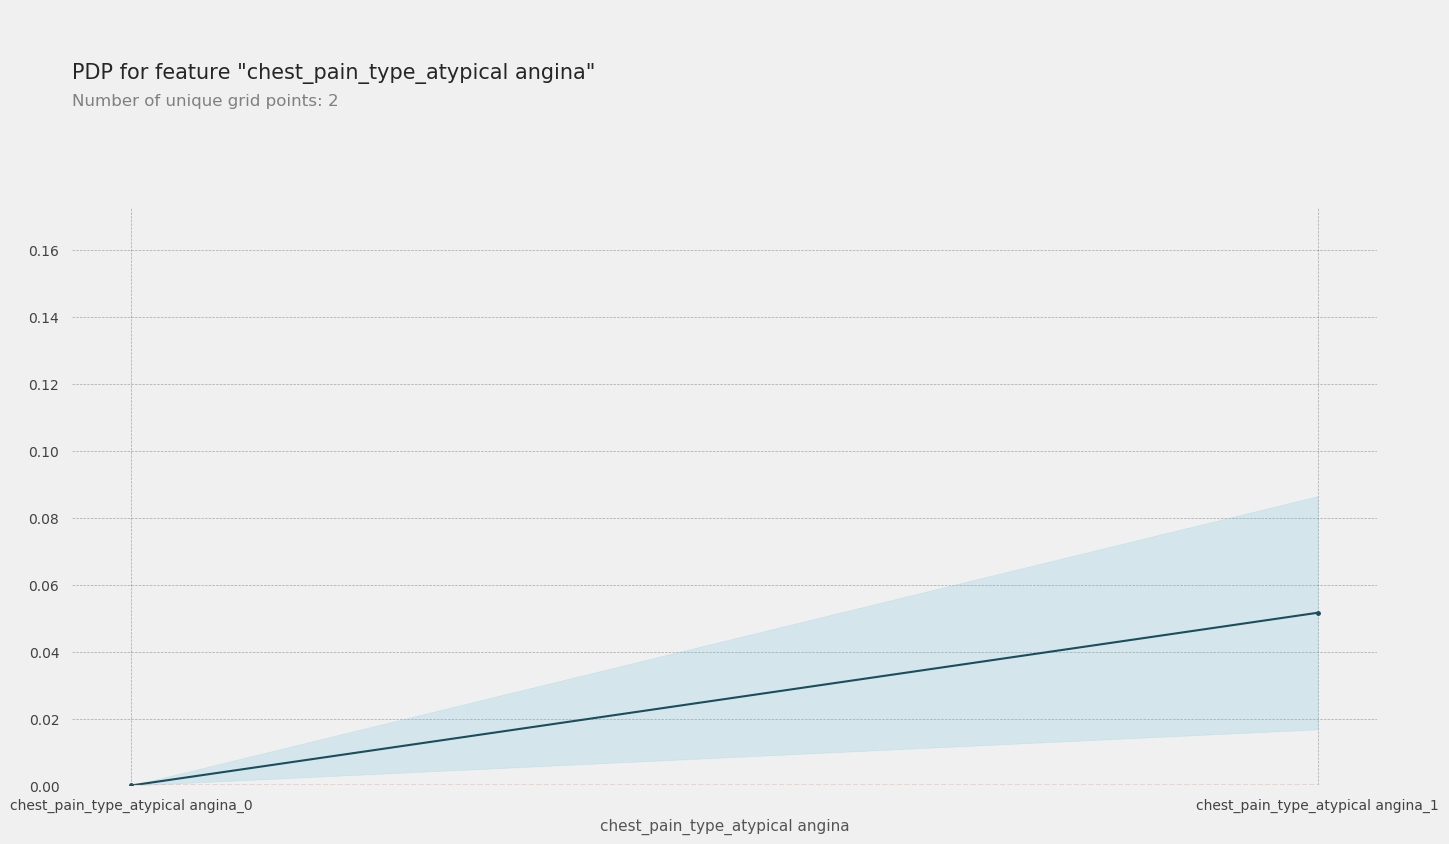

In [43]:
# plotting a partial dependence graph for chest_pain_type_atypical angina

base_features = data.columns.values.tolist()

feat_name = 'chest_pain_type_atypical angina'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


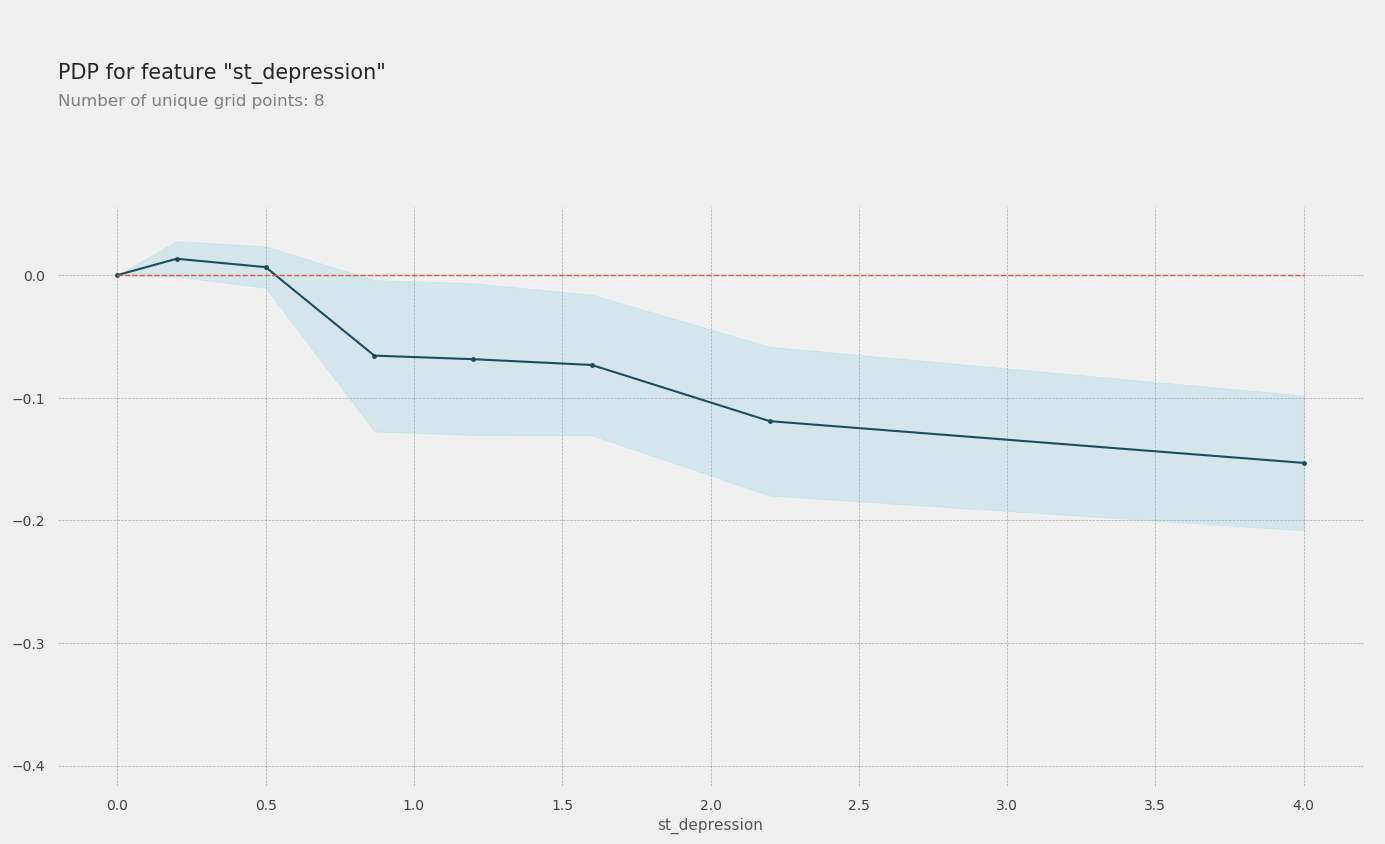

In [44]:
# plotting a partial dependence graph for st_depression


base_features = data.columns.values.tolist()

feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model = model, dataset = x_test, model_features = base_features, feature = feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


**Shap Values**

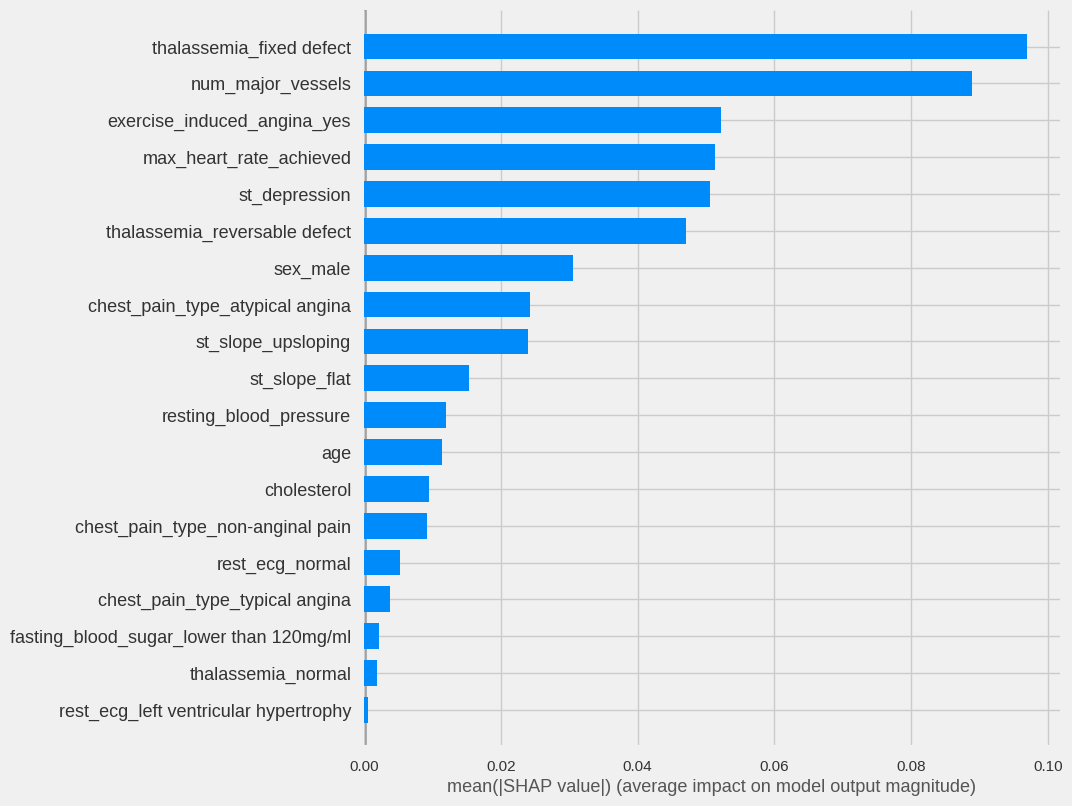

In [45]:
# let's see the shap values

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_test)

shap.summary_plot(shap_values[1], x_test, plot_type="bar")

**Shap Values for Model Explanation**

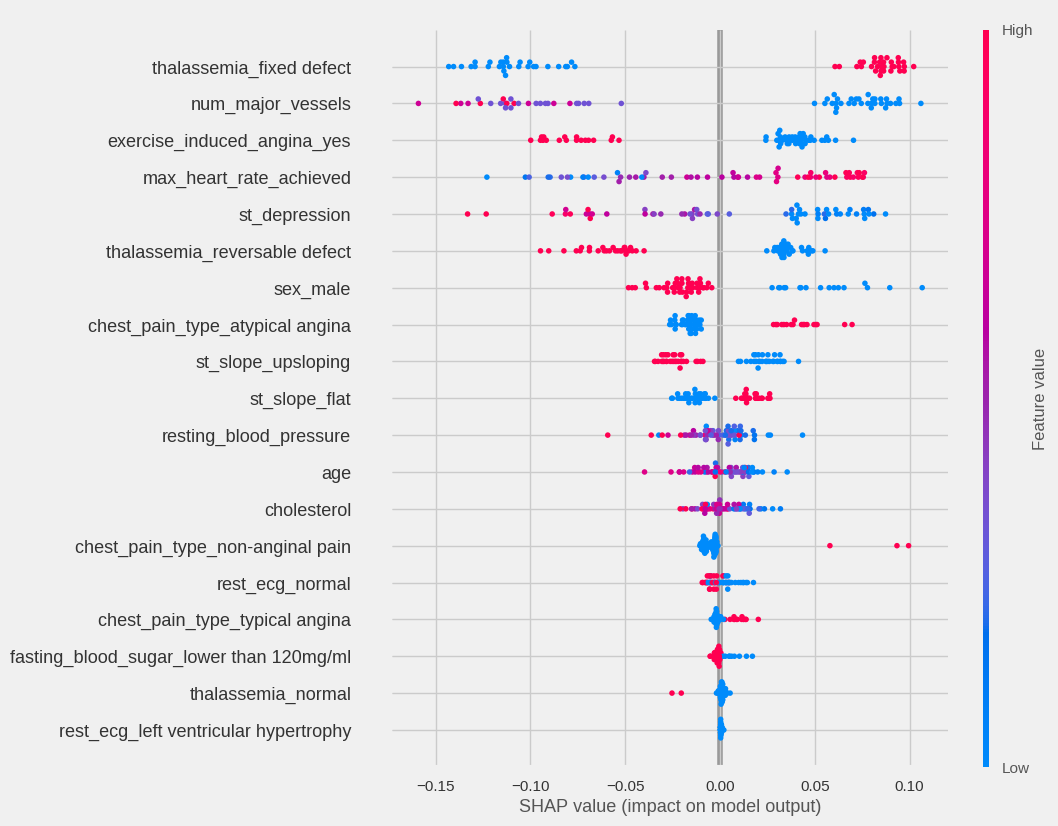

In [46]:
shap.summary_plot(shap_values[1], x_test)


In [47]:
# let's create a function to check the patient's conditions

def patient_analysis(model, patient):
  explainer = shap.TreeExplainer(model)
  shap_values = explainer.shap_values(patient)
  shap.initjs()
  return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

**Report for the First Patient**

In [48]:
# let's do some real time prediction for patients

patients = x_test.iloc[1,:].astype(float)
patient_analysis(model, patients)

**Report for the Second Patient**

In [49]:
patients = x_test.iloc[:, 2].astype(float)
patient_analysis(model, patients)

**Report for the Third Patient**

In [50]:
patients = x_test.iloc[:,3].astype(float)
patient_analysis(model, patients)

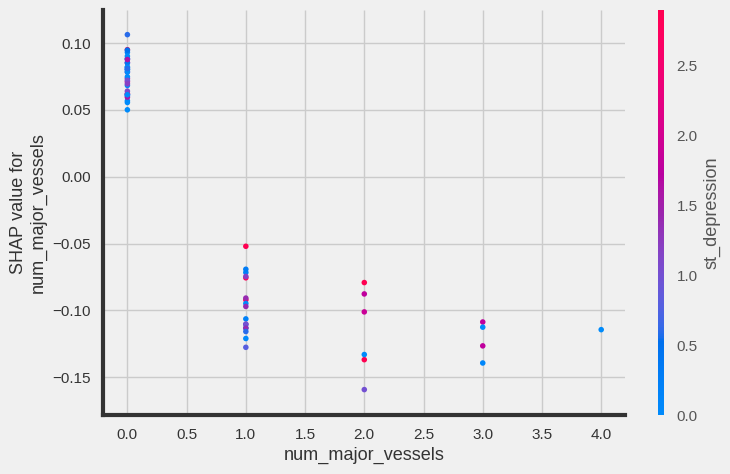

In [51]:
# dependence plot

shap.dependence_plot('num_major_vessels', shap_values[1], x_test, interaction_index = "st_depression")

**Force Plot**

In [52]:
shap_values = explainer.shap_values(x_train.iloc[:50])
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], x_test.iloc[:50])

**Thanks for Reading the Kernel, Please Upvote it if you like.**